In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
import PIL
from PIL import Image
import urllib
from urllib.request import urlopen

## K = 10

In [35]:
n_colors = 10

## Reading Image

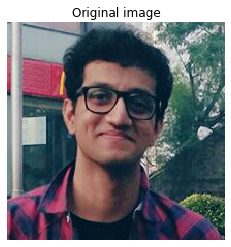

In [2]:
img=np.asarray(Image.open(urllib.request.urlopen("https://avatars0.githubusercontent.com/u/34798203")))

# Normalizing
img = np.array(img, dtype=np.float64) / 255

plt.axis('off')
plt.title('Original image')
plt.imshow(img)

In [3]:
# Load Image and transform to a 2D numpy array.
w, h, d = tuple(img.shape)
image_array = np.reshape(img, (w * h, d))

## Recreate the (compressed) image from the code book & labels

In [4]:
def recreate_image(codebook, labels, w, h):
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

## Random Quantized Image

In [8]:
codebook_random = shuffle(image_array)[:n_colors]

labels_random = pairwise_distances_argmin(codebook_random,image_array,axis=0)

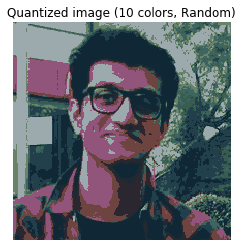

In [9]:
plt.axis('off')
plt.title('Quantized image ({} colors, Random)'.format(n_colors))
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

## K-Means

In [10]:
#Fitting model on a small sub-sample of the data
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)

In [11]:
# Get labels for all points
print("Labels:")
labels = kmeans.predict(image_array)
print(labels)

Labels:
[4 3 6 ... 6 6 9]


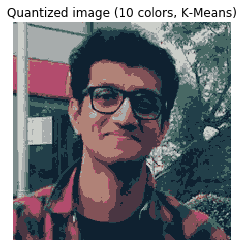

In [12]:
plt.axis('off')
plt.title('Quantized image ({} colors, K-Means)'.format(n_colors))
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

## Different values of K

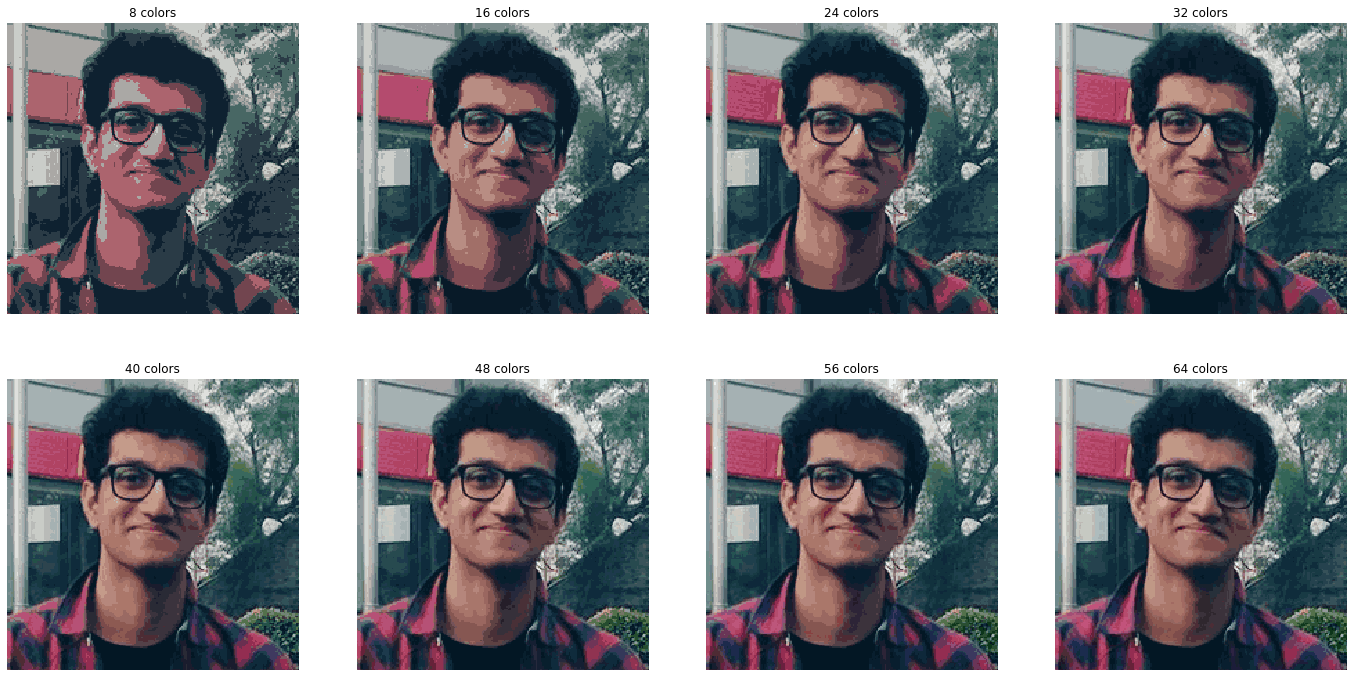

In [33]:
plt.figure(figsize=(24,12))
for i in range(8):
    plt.subplot(2,4,i+1)
    
    image_array_sample = shuffle(image_array, random_state=0)[:1000]
    kmeans = KMeans(n_clusters=(i+1)*8, random_state=0).fit(image_array_sample)
    labels = kmeans.predict(image_array)
    plt.title('{} colors'.format((i+1)*8))
    plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
    plt.axis('off')